In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size':10,'figure.figsize':(16,10)})

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA


In [175]:
name=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
df=pd.read_csv('wine.xls',sep=',',names=name)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [176]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [177]:
df.A.value_counts()

2    71
1    59
3    48
Name: A, dtype: int64

In [178]:
X=df.drop('A',axis=1)
y=df['A']

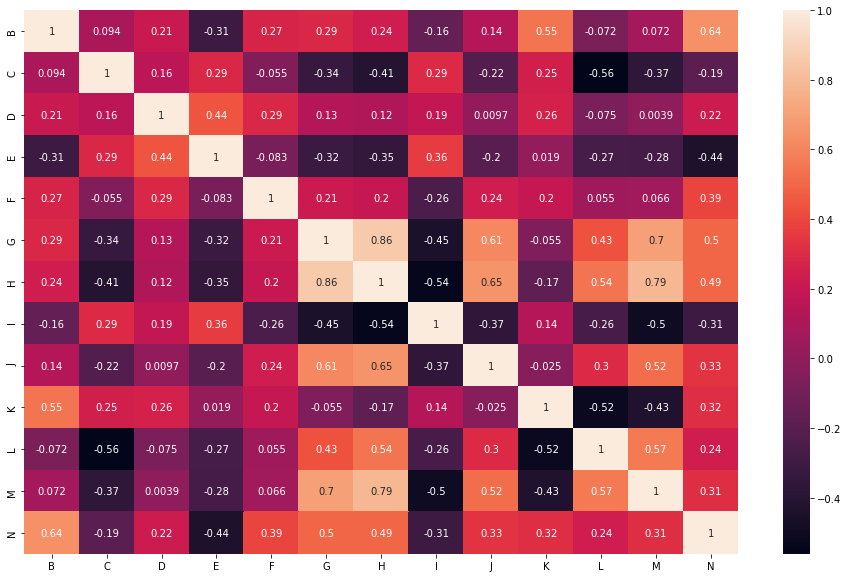

In [157]:
sns.heatmap(X.corr(),annot=True)
plt.show()

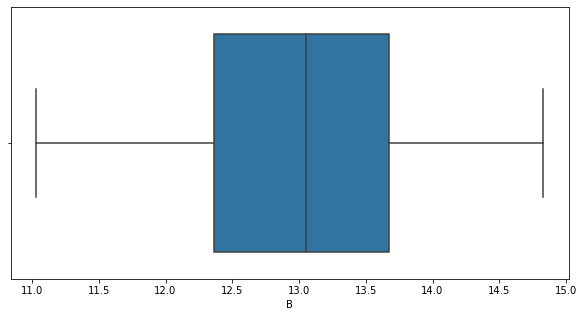

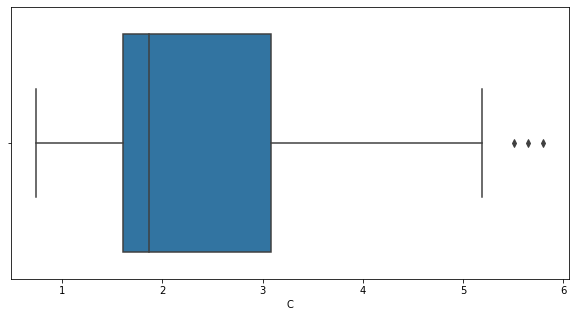

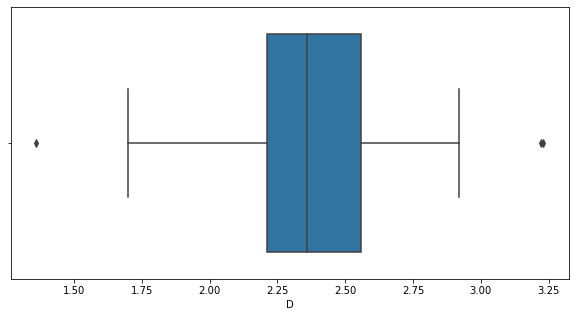

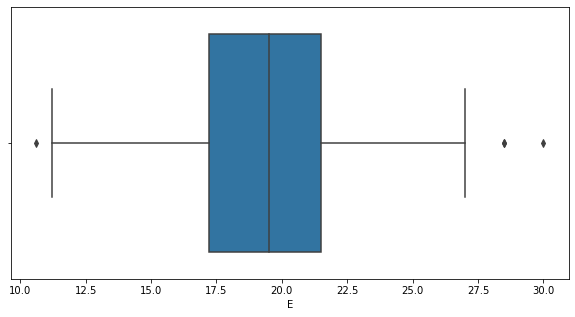

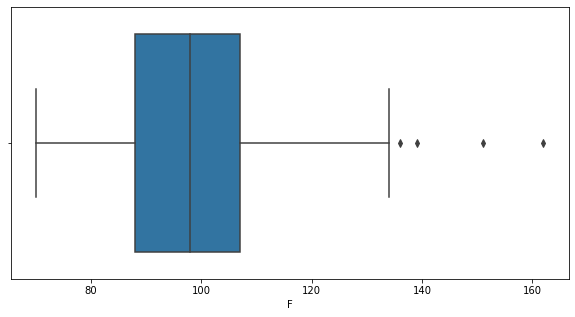

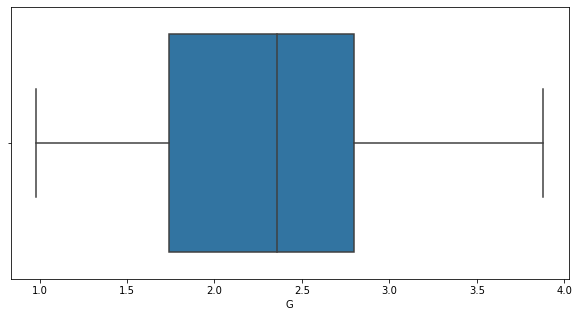

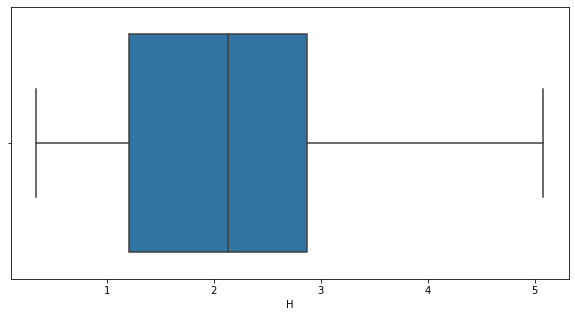

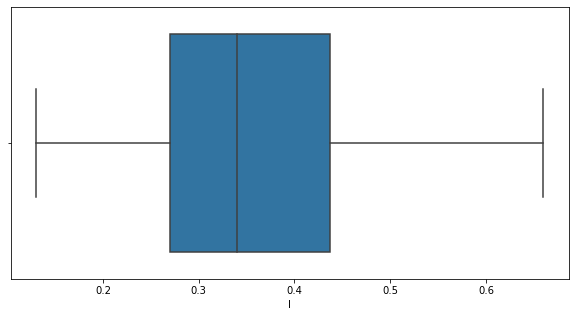

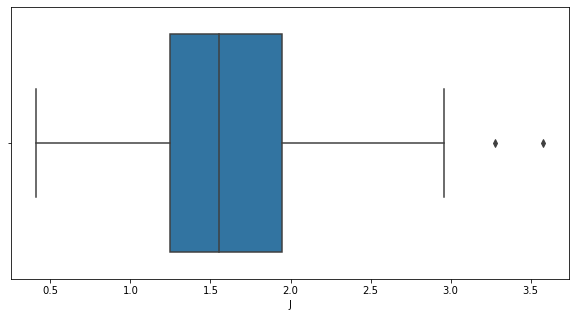

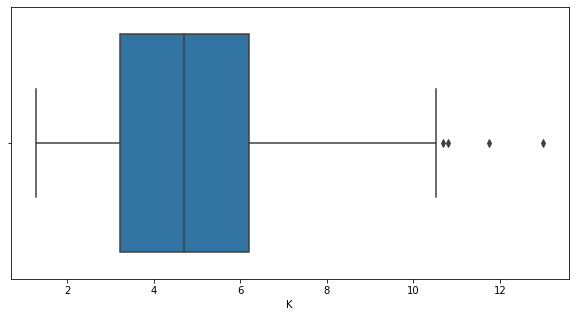

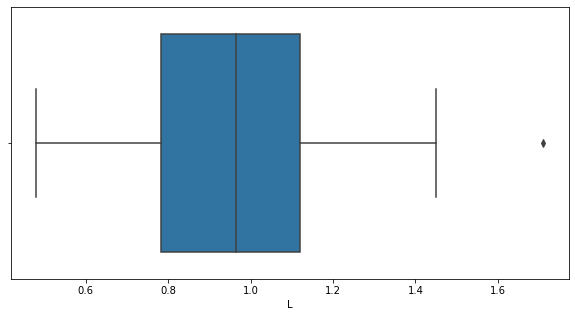

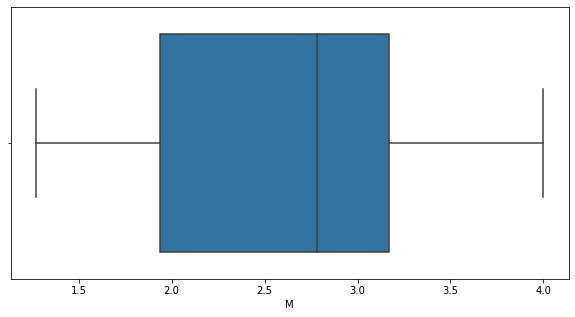

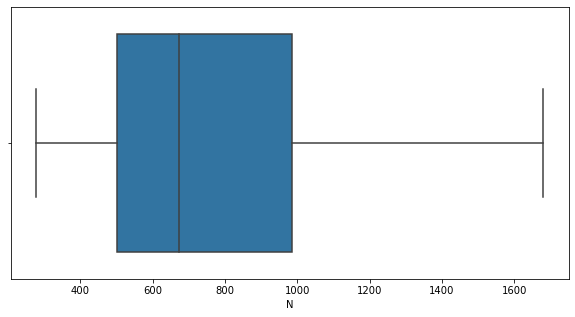

In [158]:
for x in list(X.columns):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[x],whis=1.5)
    plt.show()

In [181]:
q1=X['C'].quantile(0.25)
q3=X['C'].quantile(0.75)
iqr=q3-q1
X['C']=np.where(X['C']>(q3+1.5*iqr),q3,X['C'])
X['C']=np.where(X['C']<(q1-1.5*iqr),q1,X['C'])

In [183]:
q1=X['D'].quantile(0.25)
q3=X['D'].quantile(0.75)
iqr=q3-q1
X['D']=np.where(X['D']>(q3+1.5*iqr),q3,X['D'])
X['D']=np.where(X['D']<(q1-1.5*iqr),q1,X['D'])

In [184]:
q1=X['E'].quantile(0.25)
q3=X['E'].quantile(0.75)
iqr=q3-q1
X['E']=np.where(X['E']>(q3+1.5*iqr),q3,X['E'])
X['E']=np.where(X['E']<(q1-1.5*iqr),q1,X['E'])

In [185]:
q1=X['F'].quantile(0.25)
q3=X['F'].quantile(0.75)
iqr=q3-q1
X['F']=np.where(X['F']>(q3+1.5*iqr),q3,X['F'])
X['F']=np.where(X['F']<(q1-1.5*iqr),q1,X['F'])

In [186]:
q1=X['J'].quantile(0.25)
q3=X['J'].quantile(0.75)
iqr=q3-q1
X['J']=np.where(X['J']>(q3+1.5*iqr),q3,X['J'])
X['J']=np.where(X['J']<(q1-1.5*iqr),q1,X['J'])

In [187]:
q1=X['K'].quantile(0.25)
q3=X['K'].quantile(0.75)
iqr=q3-q1
X['K']=np.where(X['K']>(q3+1.5*iqr),q3,X['K'])
X['K']=np.where(X['K']<(q1-1.5*iqr),q1,X['K'])

In [188]:
q1=X['L'].quantile(0.25)
q3=X['L'].quantile(0.75)
iqr=q3-q1
X['L']=np.where(X['L']>(q3+1.5*iqr),q3,X['L'])
X['L']=np.where(X['L']<(q1-1.5*iqr),q1,X['L'])

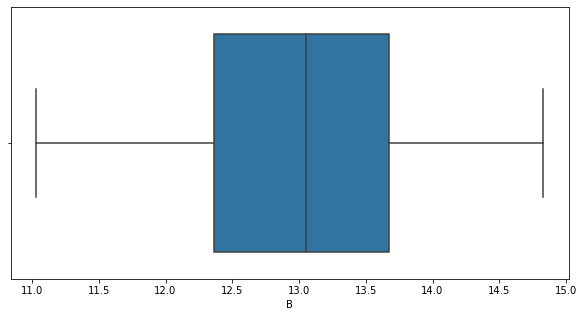

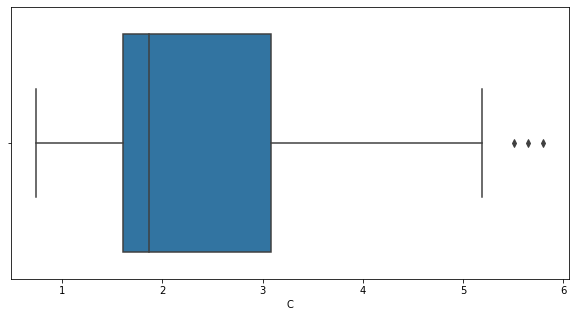

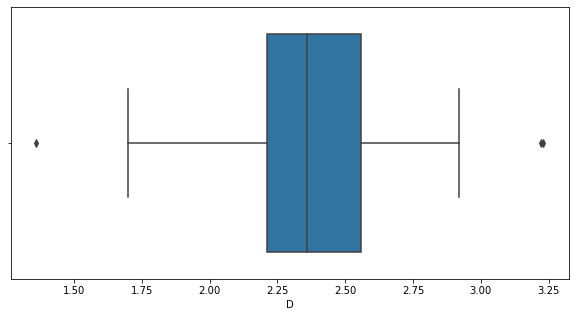

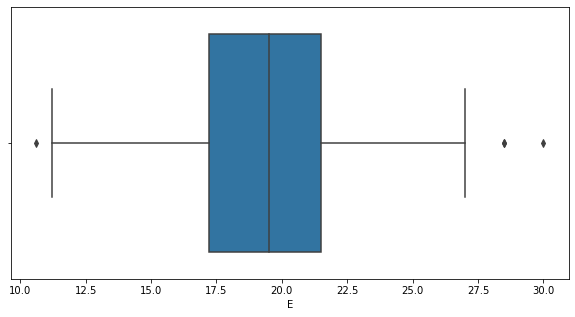

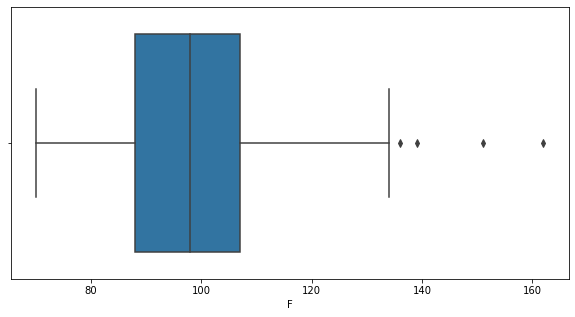

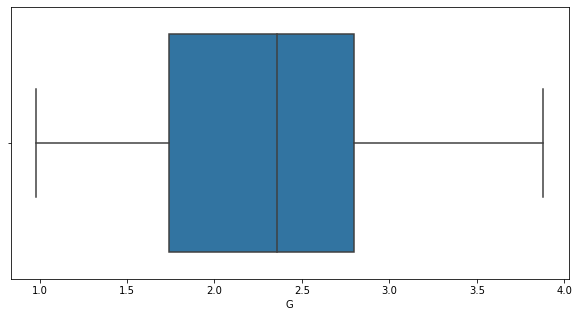

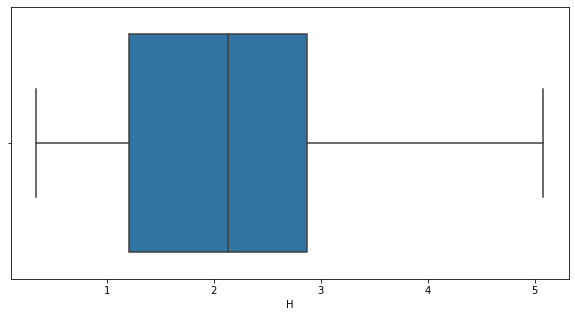

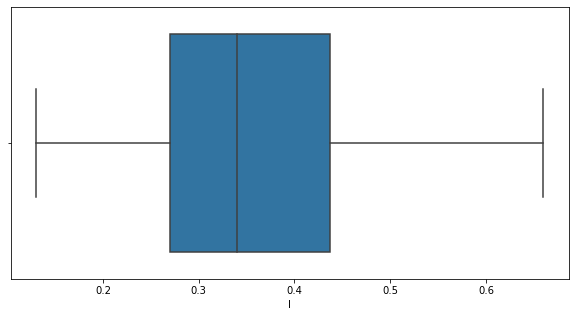

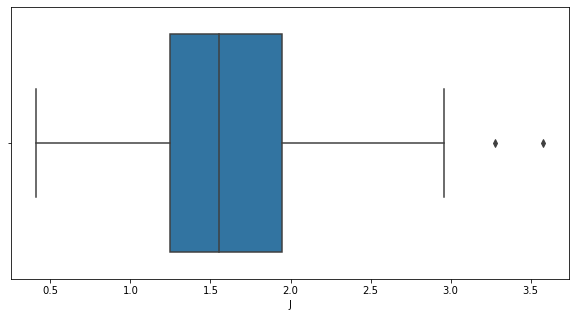

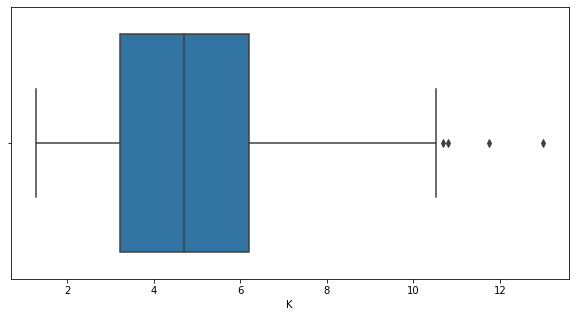

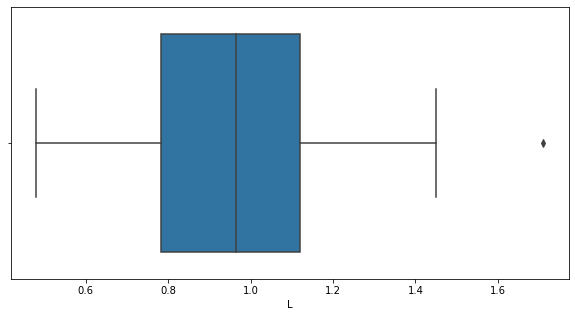

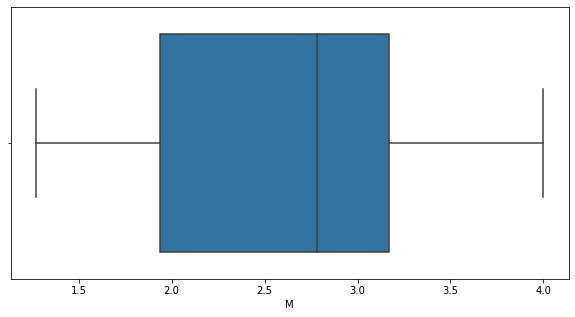

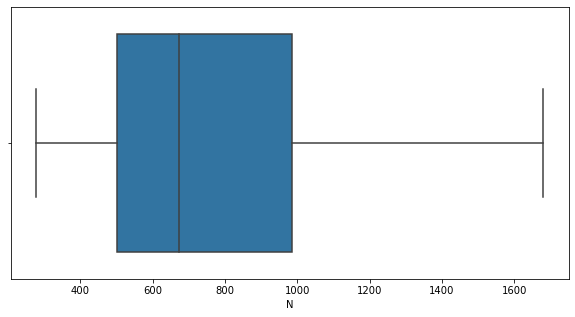

In [190]:
for x in list(X.columns):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[x])
    plt.show()

### Kmeans

In [192]:
ss=StandardScaler()

In [205]:
X_scaled=ss.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=list(X.columns))

In [206]:
wcss=[]
for num in range(1,15):
    kmean=KMeans(n_clusters=num)
    kmean.fit(X_scaled)
    wcss.append(kmean.inertia_)

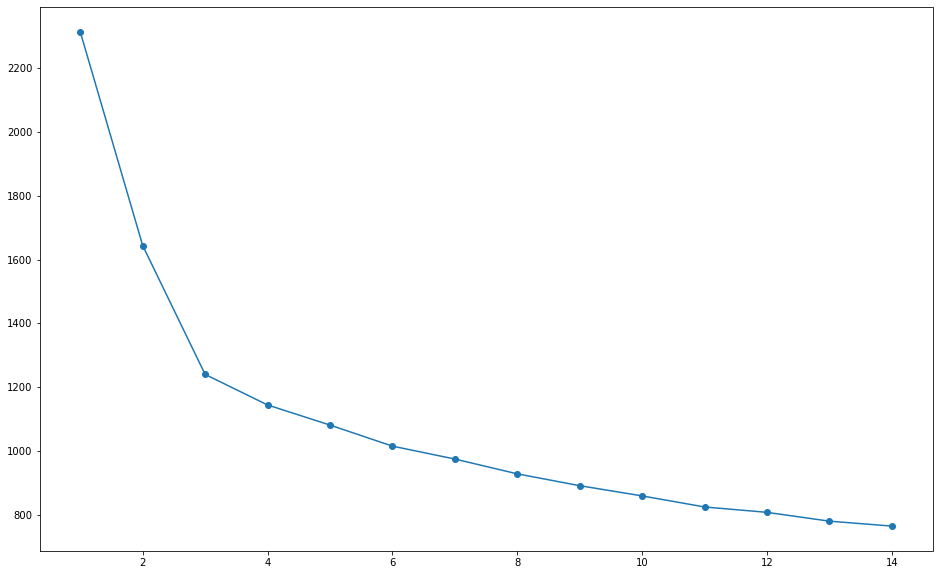

In [207]:
plt.plot(range(1,15),wcss,marker='o')
plt.show()

In [208]:
kmean=KMeans(n_clusters=3)
kmean.fit(X_scaled)

KMeans(n_clusters=3)

In [209]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [210]:
pd.DataFrame(kmean.cluster_centers_ ,columns=list(X.columns))

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.859670,-0.278660,0.342919,-0.732425,0.628565,0.894368,0.989887,-0.565776,0.605952,0.268519,0.496494,0.791598,1.133706
1,0.164907,0.888794,0.217324,0.605041,-0.014342,-0.979330,-1.215248,0.726064,-0.797325,0.895718,-1.185504,-1.292412,-0.407088
2,-0.921972,-0.429246,-0.484873,0.209406,-0.569864,-0.069857,0.024159,-0.038135,0.056068,-0.940322,0.457190,0.267054,-0.733252


In [240]:
X_scaled['label']=kmean.labels_

In [247]:
X_scaled['label']=X_scaled['label'].replace({2:3,1:2,0:1})

In [249]:
X_scaled['label']=X_scaled['label'].astype('category')

In [250]:
X_scaled['label'].value_counts()

3    66
1    61
2    51
Name: label, dtype: int64

In [268]:
np.array(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [270]:
np.array(X_scaled['label'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [266]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [252]:
accuracy_score(y,X_scaled['label'])

0.34831460674157305

In [253]:
X1=X_scaled.drop('label',axis=1)

In [258]:
X1.head()

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1.518613,-0.565522,0.267173,-1.254417,2.294159,0.808997,1.034819,-0.659563,1.332135,0.335178,0.388267,1.847920,1.013009
1,0.246290,-0.497623,-0.903083,-2.704755,0.094293,0.568648,0.733629,-0.820719,-0.547702,-0.266163,0.433485,1.113449,0.965242
2,0.196879,0.064970,1.235661,-0.265550,0.175770,0.808997,1.215533,-0.498407,2.299972,0.354268,0.343049,0.788587,1.395148
3,1.691550,-0.332725,0.549649,-0.858870,1.153488,2.491446,1.466525,-0.981875,1.127400,1.366048,-0.425661,1.184071,2.334574
4,0.295700,0.288067,2.042734,0.525544,1.560870,0.808997,0.663351,0.226796,0.457359,-0.294799,0.388267,0.449601,-0.037874


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [260]:
dt=DecisionTreeClassifier(max_depth=3)

In [262]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [263]:
ypred=dt.predict(X_test)

In [265]:
accuracy_score(y_test,ypred)

0.9629629629629629

### Hierarchical Clustering

In [290]:
X1.head()

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1.518613,-0.565522,0.267173,-1.254417,2.294159,0.808997,1.034819,-0.659563,1.332135,0.335178,0.388267,1.847920,1.013009
1,0.246290,-0.497623,-0.903083,-2.704755,0.094293,0.568648,0.733629,-0.820719,-0.547702,-0.266163,0.433485,1.113449,0.965242
2,0.196879,0.064970,1.235661,-0.265550,0.175770,0.808997,1.215533,-0.498407,2.299972,0.354268,0.343049,0.788587,1.395148
3,1.691550,-0.332725,0.549649,-0.858870,1.153488,2.491446,1.466525,-0.981875,1.127400,1.366048,-0.425661,1.184071,2.334574
4,0.295700,0.288067,2.042734,0.525544,1.560870,0.808997,0.663351,0.226796,0.457359,-0.294799,0.388267,0.449601,-0.037874


In [273]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [284]:
z=linkage(X1,method='complete')
c,coph_dist=cophenet(z,pdist(X1))

In [285]:
c

0.6331925824863219

In [286]:
z=linkage(X1,method='single')
c,coph_dist=cophenet(z,pdist(X1))

In [287]:
c

0.5055215132186512

In [288]:
z=linkage(X1,method='average')
c,coph_dist=cophenet(z,pdist(X1))

In [289]:
c

0.7391258182942776

In [291]:
z=linkage(X1,method='centroid')
c,coph_dist=cophenet(z,pdist(X1))

In [292]:
c

0.7392833470723954

In [293]:
z=linkage(X1,method='ward')
c,coph_dist=cophenet(z,pdist(X1))

In [294]:
c

0.6894154197964445

centroid linkage method is the best among all the other linkage methods

In [299]:
z=linkage(X1,method='ward')

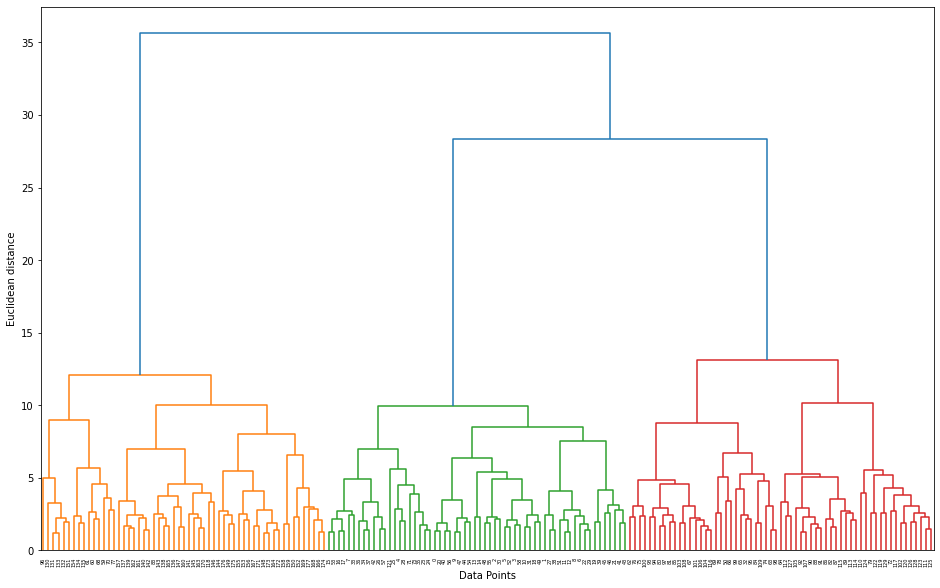

In [300]:
dendrogram(z,leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean distance")
plt.show()

In [301]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(X1)

AgglomerativeClustering(n_clusters=3)

In [302]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [303]:
X1['label']=cluster.labels_

In [304]:
accuracy_score(y,X1['label'])

0.016853932584269662

In [309]:
X2=X1.drop('label',axis=1)
y2=X1['label']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [311]:
lr=LogisticRegression()

In [312]:
lr.fit(X_train,y_train)

LogisticRegression()

In [313]:
ypred=lr.predict(X_test)

In [314]:
accuracy_score(y_test,ypred)

0.9814814814814815

### PCA

In [352]:
X.head()

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [354]:
X_scaled=ss.fit_transform(X)

In [360]:
cov_mat=np.cov(X_scaled.T)

In [361]:
eigen_val,eigen_vec=np.linalg.eig(cov_mat)

In [362]:
tot=sum(eigen_val)
sort_eig=[(x/tot)*100   for x in sorted(eigen_val, reverse = True)]

In [363]:
cum_eig=np.cumsum(sort_eig)

In [364]:
cum_eig

array([ 37.15332887,  57.5088071 ,  67.345115  ,  74.35159848,
        80.38555021,  84.82376432,  88.6412967 ,  91.52010764,
        93.88714645,  95.87663508,  97.74390969,  99.21580774,
       100.        ])

More than 95% of variance is explained by 10 PC

In [365]:
eigen_pair=[(eigen_val[i],eigen_vec[:,i])   for i in range(len(eigen_val))]

In [366]:
pd.DataFrame(eigen_pair)

,0,1
0,4.857221,"[-0.15408080163327026, 0.23876005369965903, 0...."
1,2.661163,"[0.4632994886300821, 0.2416593098106096, 0.316..."
2,1.285944,"[0.16883922279693686, -0.06502387255246514, -0..."
3,0.915989,"[0.0299298520617095, -0.5365794428368303, 0.20..."
4,0.788845,"[-0.2304454761628779, 0.09205684092562103, -0...."
5,0.580228,"[-0.241204325796395, -0.6319878879740777, -0.0..."
6,0.499083,"[-0.33034002575102317, 0.2425185019938077, -0...."
7,0.102521,"[0.06120952937809141, 0.003260279833692788, -0..."
8,0.376360,"[-0.20478459264266224, -0.16830483184537126, 0..."
9,0.309454,"[-0.5623474015775684, 0.10198749976916414, 0.4..."


In [367]:
eigen_pair.sort()
eigen_pair.reverse()

In [368]:
eigen_val_sort=[eigen_pair[index][0] for index in range(len(eigen_val))]
eigen_vec_sort=[eigen_pair[index][1] for index in range(len(eigen_val))]

In [374]:
p_reduced=np.array(eigen_vec_sort[0:10]).T

In [373]:
X_scaled.shape

(178, 13)

In [376]:
p_2d=np.dot(X_scaled,p_reduced)

In [380]:
p_2d.shape

(178, 10)

In [377]:
X_train, X_test, y_train, y_test = train_test_split(p_2d, y, test_size=0.3, random_state=42)

In [381]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [382]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [383]:
ypred=lr.predict(X_test)

In [384]:
accuracy_score(y_test,ypred)

0.9814814814814815

In [386]:
from sklearn.metrics import classification_report

In [388]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

